# Differences in total distance covered between runs with and without tides, for GC+FES as well as GC+FES30

*Author: Miriam Sterl*

We plot the differences in total distance covered by particles that started at the same initial position, for the simulations with tides (GC+FES and GC+FES30) and the simulation without tides (GC).

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [ ]:
File1 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGC.nc'
dataset1 = Dataset(File1)
lat1 = dataset1.variables['lat'][:]
lon1 = dataset1.variables['lon'][:]
time1 = dataset1.variables['time'][:]
dist1 = dataset1.variables['distance'][:]
lon1[lon1>180]-=360
lon1[lon1<-180]+=360

File2 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGCFES.nc'
dataset2 = Dataset(File2)
lat2 = dataset2.variables['lat'][:]
lon2 = dataset2.variables['lon'][:]
time2 = dataset2.variables['time'][:]
dist2 = dataset2.variables['distance'][:]
lon2[lon2>180]-=360
lon2[lon2<-180]+=360

File3 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGCFES30.nc'
dataset3 = Dataset(File3)
lat3 = dataset3.variables['lat'][:]
lon3 = dataset3.variables['lon'][:]
time3 = dataset3.variables['time'][:]
dist3 = dataset3.variables['distance'][:]
lon3[lon3>180]-=360
lon3[lon3<-180]+=360

In [3]:
# Initial longitudes and latitudes (on 2002-01-01)
startLons = lon1[:,0]
startLats = lat1[:,0]

# Distance travelled by the particles between 2002-01-01 and 2015-01-01
finalDist1 = [dist1[:,45], dist2[:,45], dist3[:,45]]
finalDist2 = [dist1[:,182], dist2[:,182], dist3[:,182]] 
finalDist3 = [dist1[:,-1], dist2[:,-1], dist3[:,-1]]

# Difference in distance travelled between GC+FES and GC run
finalDistDiff1 = finalDist1[1] - finalDist1[0] # after 3 months
finalDistDiff2 = finalDist2[1] - finalDist2[0] # after 1 year
finalDistDiff3 = finalDist3[1] - finalDist3[0] # after 13 years

# Difference in distance travelled between GC+FES30 and GC run
finalDistDiff4 = finalDist1[2] - finalDist1[0] # after 3 months
finalDistDiff5 = finalDist2[2] - finalDist2[0] # after 1 year
finalDistDiff6 = finalDist3[2] - finalDist3[0] # after 12 years

titles = ['(a) Tides for 13 years, after 3 months', '(b) Tides for 13 years, after 1 year', 
          '(c) Tides for 13 years, after 13 years', '(d) Tides for 30 days, after 3 months',
          '(e) Tides for 30 days, after 1 year', '(f) Tides for 30 days, after 13 years']

In [4]:
def DistancePlot(lons, lats, dist, fig, ax, vmin, vmax, titlenr, titlesize, labelsize, colormap):
    """
    Function that plots the total distance travelled by particles during a certain period as a function of their initial position
    """  
    minLat = np.min(np.round(lats)) # the minimal (rounded) latitude
    maxLat = np.max(np.round(lats)) # the maximal (rounded) latitude
    minLon = np.min(np.round(lons)) # the minimal (rounded) longitude
    maxLon = np.max(np.round(lons)) # the maximal (rounded) longitude

    allLats = np.arange(minLat, maxLat+1) # the latitudinal grid
    allLons = np.arange(minLon, maxLon+1) # the longitudinal grid
    
    distances = np.zeros((len(allLons), len(allLats)))
    for i in range(len(dist)):
        distances[int(np.round(lons[i]-minLon)), int(np.round(lats[i]-minLat))] = dist[i]
            # shift by minLon, minLat to get positive indices
    maskedDist = np.ma.masked_where(distances==0.0, distances) # mask land points
    
    Lat, Lon = np.meshgrid(allLats, allLons)
    distplot = ax.pcolormesh(Lon, Lat, maskedDist/1e4, cmap = colormap, vmin=vmin, vmax=vmax)
    ax.set_title(titles[titlenr], fontsize=titlesize,fontweight='bold')
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=labelsize)
    ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=labelsize)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
    cbar = fig.colorbar(distplot, ax=ax, shrink=0.7, extend='both', pad=0.02)
    cbar.set_label('Distance Difference ($10^4$ km)', rotation=90, fontsize=labelsize+2)
    cbar.ax.tick_params(labelsize=labelsize)
    
    return distplot

C:\Users\miria\Anaconda3\envs\py2_parcels_M\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Warning: converting a masked element to nan.
  from ipykernel import kernelapp as app


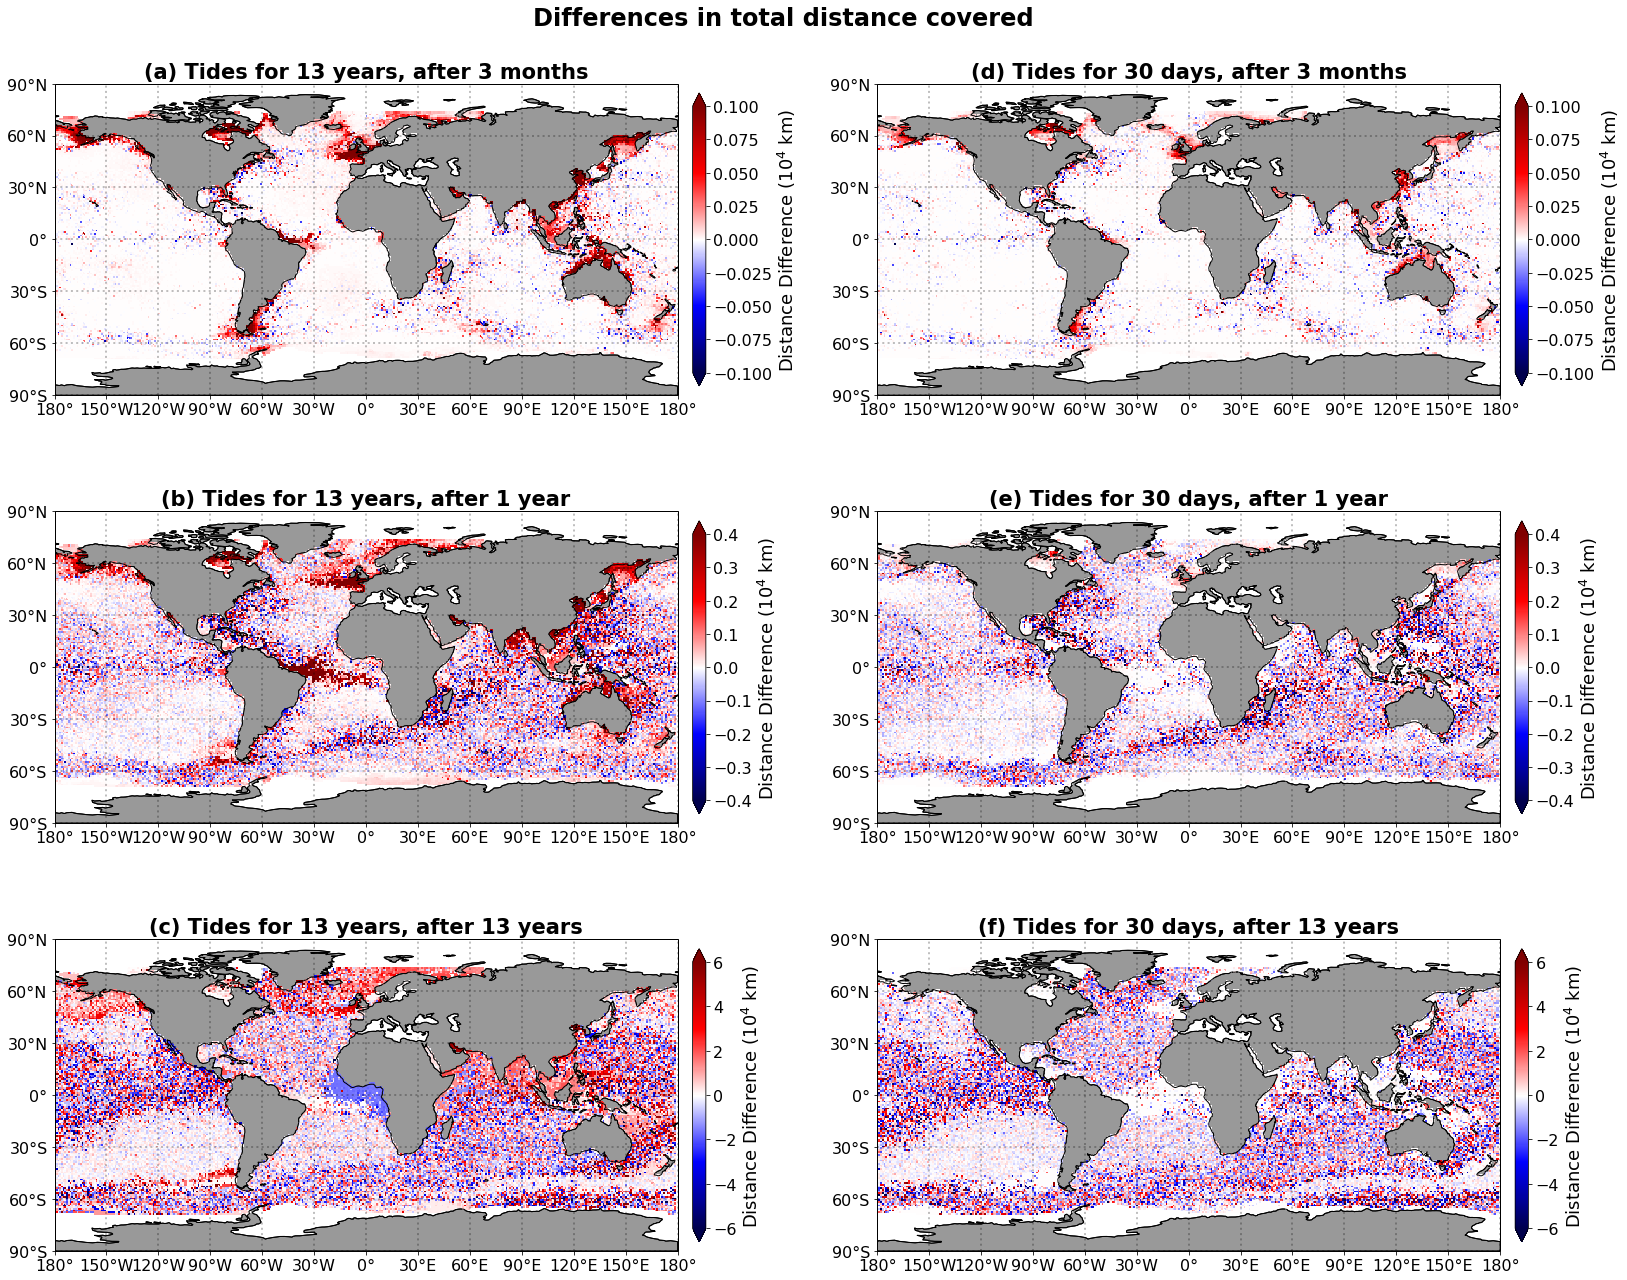

In [5]:
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(23,18), subplot_kw={'projection': ccrs.PlateCarree()})
l = 16
t = 21
distplot1 = DistancePlot(startLons, startLats, finalDistDiff1, fig, ax1, 
                         vmin=-0.1, vmax=0.1, titlenr = 0, titlesize=t, labelsize=l, colormap='seismic')
distplot2 = DistancePlot(startLons, startLats, finalDistDiff2, fig, ax2, 
                         vmin=-0.4, vmax=0.4, titlenr = 1, titlesize=t, labelsize=l, colormap='seismic')
distplot3 = DistancePlot(startLons, startLats, finalDistDiff3, fig, ax3, 
                         vmin=-6, vmax=6, titlenr = 2, titlesize=t, labelsize=l, colormap='seismic')
distplot4 = DistancePlot(startLons, startLats, finalDistDiff4, fig, ax4, 
                         vmin=-0.1, vmax=0.1, titlenr = 3, titlesize=t, labelsize=l, colormap='seismic')
distplot5 = DistancePlot(startLons, startLats, finalDistDiff5, fig, ax5, 
                         vmin=-0.4, vmax=0.4, titlenr = 4, titlesize=t, labelsize=l, colormap='seismic')
distplot6 = DistancePlot(startLons, startLats, finalDistDiff6, fig, ax6, 
                         vmin=-6, vmax=6, titlenr = 5, titlesize=t, labelsize=l, colormap='seismic')
fig.suptitle('Differences in total distance covered', x=0.475,y=1.01, fontsize=24,fontweight='bold')
plt.tight_layout()
#plt.savefig('DistanceDifferences', bbox_inches='tight')